In [1]:
### Entrenar con todo
import pandas as pd
import numpy as np

df_train = pd.read_csv("Datos/  .csv",header=None)
#df_val = pd.read_csv("Datos_split/koi_light_curves_val.csv",header=None)
df_test = pd.read_csv("Datos/koi_light_curves_test.csv",header=None)
df_candidates = pd.read_csv("Datos_split/koi_light_curves_candidate.csv",header=None)

df_labels_train = pd.read_csv('Datos_split/koi_labels_train.csv')
df_labels_val = pd.read_csv('Datos_split/koi_labels_val.csv')
df_labels_test = pd.read_csv('Datos_split/koi_labels_test.csv')

y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_val = ((df_labels_val["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values

X_train = np.concatenate((df_train.values, df_val.values,df_test.values), axis=0)
y_train = np.concatenate((y_train, y_val,y_test), axis=0)

X_candidates = df_candidates.values

Xfull_train = np.concatenate((X_train,X_candidates), axis=0)
del df_train
del df_val
del df_test
del df_candidates
del df_labels_train
del df_labels_val
del df_labels_test

In [2]:
X_train.shape

(6257, 71427)

In [4]:
##Extraer caract con el modelo elegido
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

#modelo
d=55
model =  IncrementalPCA(d)
std = StandardScaler(with_mean=True,with_std=False) #sin sacar varianza

##TODOS LOS DATOS##
Xfull_train = np.nan_to_num(Xfull_train)
#fourier
Xfull_fourier = np.abs(np.fft.fft(Xfull_train))
std.fit(Xfull_fourier)

Xfull_fourier = std.transform(Xfull_fourier)

#entrenar con full train (todo)
model.fit(Xfull_fourier)

##AJUSTAR LOS TRAIN Y CANDIDATES
X_train = np.nan_to_num(X_train)
X_candidates = np.nan_to_num(X_candidates)
#fourier
Xtrain_fourier = np.abs(np.fft.fft(X_train))
Xcandidates_fourier = np.abs(np.fft.fft(X_candidates))

Xpca_train = model.transform(Xtrain_fourier)
Xpca_candidate = model.transform(Xcandidates_fourier)

In [5]:
Xpca_train.shape

(6257, 55)

(4639, 55)

/home/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


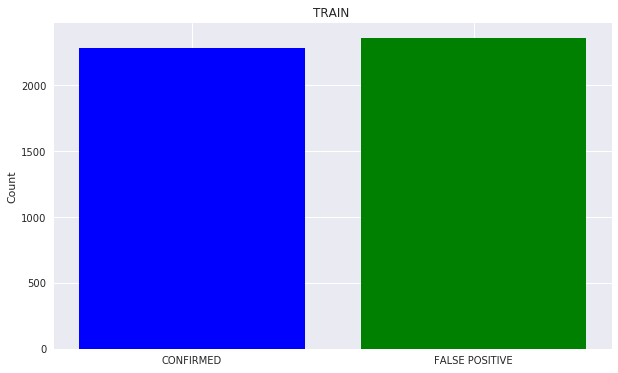

In [7]:
#subsamplear si no es el balanced..
mask = y_train!=0 #elemntos que se quedan

for i in range(len(mask)):
    element = mask[i]
    if element == False:
        if np.random.rand(1)[0] < 0.6 : #deja aprox 60% de los falsos positivos
            mask[i] = True
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("TRAIN ")
plt.bar(0, np.sum(y_train[mask]==1),color="blue")
plt.bar(1, np.sum(y_train[mask]==0),color="green")
plt.xticks([0,1],["CONFIRMED","FALSE POSITIVE"])
plt.ylabel("Count")

ysample_train = y_train[mask]
Xsample_train = Xpca_train[mask]
Xsample_train.shape

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(asd)

Xstd_train = std.transform(asd)
Xstd_candidates = std.transform(asd)

In [20]:
#algoritmo elegido
from sklearn.svm import SVC
model = SVC(kernel= 'rbf',C=c,gamma='auto',class_weight = 'balanced')
model.fit(Xstd_train,ysample_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
ypred_candidates = model.predict(Xstd_candidates) # o Xstd_candidates
ypred_candidates.shape

(1797,)

In [18]:
ypred_candidates

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
print("Cantidad de Confirmados %d",np.sum(ypred_candidates))
print("Cantidad de Falsos positivos(noconfirmados) %d",(len(ypred_candidates)-np.sum(ypred_candidates)))

('Cantidad de Confirmados %d', 1708)
('Cantidad de Falsos positivos(noconfirmados) %d', 89)


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15,max_depth=10,n_jobs=-1,class_weight = 'balanced') 
model.fit(asd,asd)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=18, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
ypred_candidates = model.predict(asd) 

In [26]:
print("Cantidad de Confirmados %d",np.sum(ypred_candidates))
print("Cantidad de Falsos positivos(noconfirmados) %d",(len(ypred_candidates)-np.sum(ypred_candidates)))

('Cantidad de Confirmados %d', 1259)
('Cantidad de Falsos positivos(noconfirmados) %d', 538)


In [ ]:

#mostrar nombres? ra dec?
labels_candidates = pd.read_csv('Datos_split/koi_labels_candidate.csv.csv')
labels_candidates.head()